In [1]:
import h5py
import rasterio
from rasterio.mask import mask
from rasterio.transform import from_origin
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd 
import pandas as pd
from dnb_annual import *
from variables import years, composites
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable

TypeError: subplots_adjust() got an unexpected keyword argument 'pad_inches'

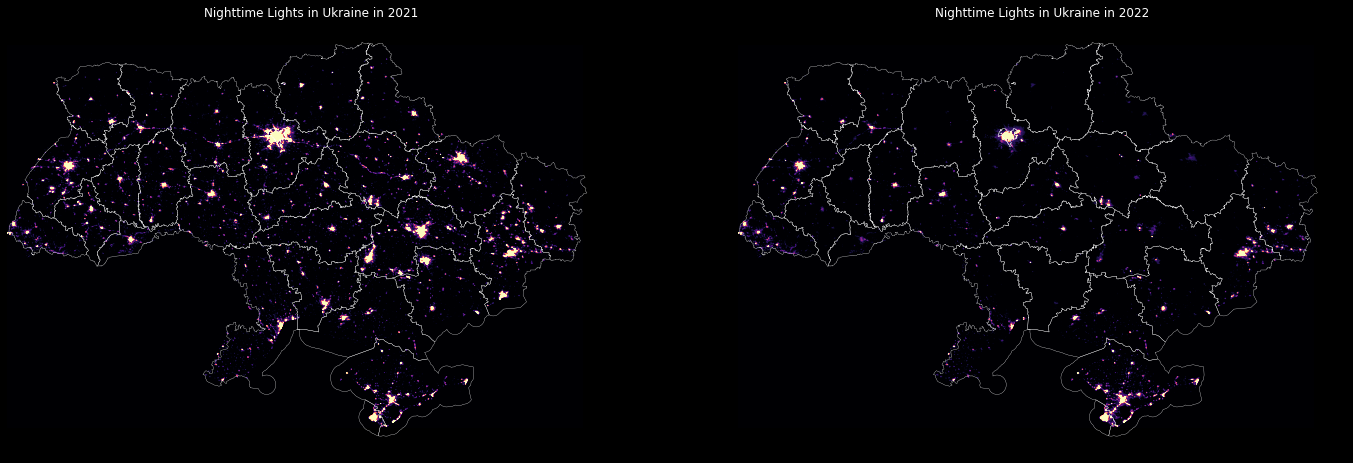

In [2]:
# Load the rasters
ukraine_2021 = rasterio.open("data/annual_rasters/2021_ukr_AllAngle_Composite_Snow_Free_dnb_hq.tif")
ukraine_2022 = rasterio.open("data/annual_rasters/2022_ukr_AllAngle_Composite_Snow_Free_dnb_hq.tif")

# read ukranian borders
ukraine_polygon = gpd.read_file("data/ukraine-outline_710.geojson")
reg_bbox = ukraine_polygon["geometry"].total_bounds
extent = [reg_bbox[0], reg_bbox[2], reg_bbox[1], reg_bbox[3]]

# read regional borders
regions = gpd.read_file("geoBoundaries-UKR-ADM1.geojson")

# mask the raster
masked_2021, transform = mask(ukraine_2021, ukraine_polygon["geometry"], crop=True, all_touched=True)
masked_2022, transform = mask(ukraine_2022, ukraine_polygon["geometry"], crop=True, all_touched=True)

norm = Normalize(vmin=0, vmax=40)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24, 8), facecolor='black')
fig.patch.set_facecolor('black')

# Plot 2021 raster
im1 = axes[0].imshow(masked_2021[0], extent=extent, norm=norm, cmap="magma")
#ukraine_polygon.boundary.plot(ax=axes[0], edgecolor='white', linewidth=0.6)
regions.boundary.plot(ax=axes[0], edgecolor='white', linewidth=0.3)
axes[0].set_title("Nighttime Lights in Ukraine in 2021", color='white')
axes[0].axis('off')

# Plot 2022 raster
im2 = axes[1].imshow(masked_2022[0], extent=extent, norm=norm, cmap="magma")
# ukraine_polygon.boundary.plot(ax=axes[1], edgecolor='white', linewidth=0.6)
regions.boundary.plot(ax=axes[1], edgecolor='white', linewidth=0.3)
axes[1].set_title("Nighttime Lights in Ukraine in 2022", color='white')
axes[1].axis('off')

plt.subplots_adjust(wspace=0, hspace=0, left=0, right=1, top=1, bottom=0, pad_inches=0)
fig.patch.set_alpha(0)
plt.show()

In [3]:
# Load data, pol
poland_polygons = gpd.read_file("poland_boundaries.geojson")
poland_polygons = clean_pol_polygons(poland_polygons)
dnb_2021_pol = dnb_annual(2021, composites, poland_polygons, "pol")
dnb_2021_pol.load_regional_images()

dnb_2022_pol = dnb_annual(2022, composites, poland_polygons, "pol")
dnb_2022_pol.load_regional_images()

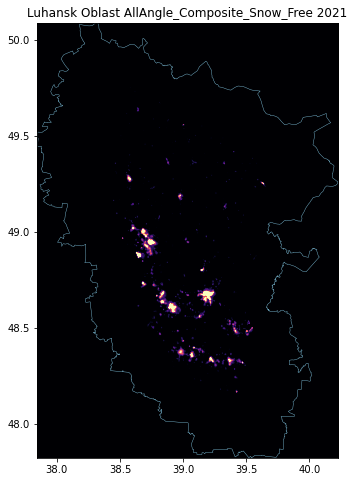

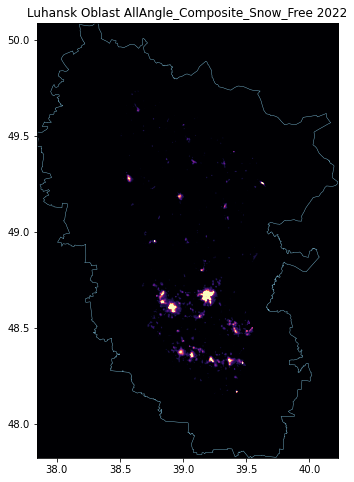

In [5]:
# compare region in 2021 and 2022
dnb_type = "AllAngle_Composite_Snow_Free"
region = "Luhansk Oblast"

dnb_2021_ukr.plot_regional_image(dnb_type, region, high_quality=True)
dnb_2022_ukr.plot_regional_image(dnb_type, region, high_quality=True)

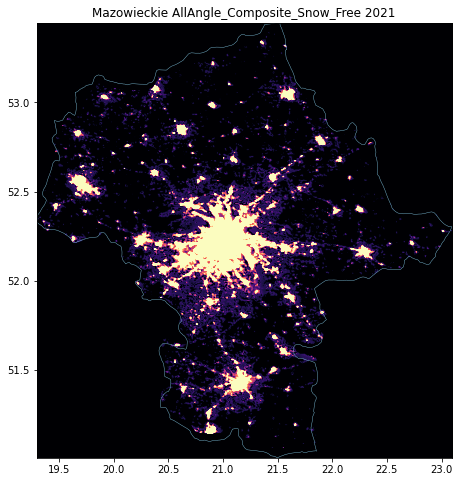

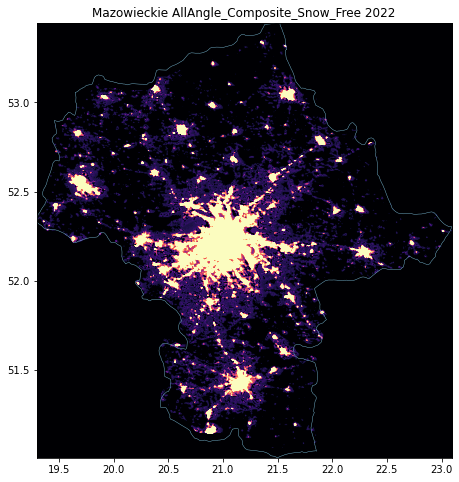

In [5]:
# compare region in 2021 and 2022
dnb_type = "AllAngle_Composite_Snow_Free"
region = "Mazowieckie"

dnb_2021_pol.plot_regional_image(dnb_type, region, high_quality=True)
dnb_2022_pol.plot_regional_image(dnb_type, region, high_quality=True)